### Dataset Link: https://www.kaggle.com/c/instacart-market-basket-analysis/data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_recommenders as tfrs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/Users/meetpatel/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products__prior = pd.read_csv("order_products__prior.csv")
order_products__train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
orders.sort_values(by='order_id', ascending=True).head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0


In [7]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
order_products__prior_and_orders_join = pd.merge(orders, order_products__prior)

In [11]:
order_products__prior_and_orders_join.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [12]:
products_and_aisles_join = pd.merge(products, aisles)

In [13]:
products_and_aisles_join

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,2,All-Seasons Salt,104,13,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care


In [14]:
products_and_aisles_join_and_departments_join = pd.merge(products_and_aisles_join, departments)

In [15]:
products_and_aisles_join_and_departments_join

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [16]:
df = pd.merge(products_and_aisles_join_and_departments_join,order_products__prior_and_orders_join)

In [17]:
df.groupby('product_id').sum()

,product_name,aisle_id,department_id,aisle,department,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
product_id,,,,,,,,,,,,,,
1,Chocolate Sandwich CookiesChocolate Sandwich C...,112972,35188,cookies cakescookies cakescookies cakescookies...,snackssnackssnackssnackssnackssnackssnackssnac...,3174449206,189108251,priorpriorpriorpriorpriorpriorpriorpriorpriorp...,35924,5142,24517,18299.0,10745,1136
2,All-Seasons SaltAll-Seasons SaltAll-Seasons Sa...,9360,1170,spices seasoningsspices seasoningsspices seaso...,pantrypantrypantrypantrypantrypantrypantrypant...,154118818,7939202,priorpriorpriorpriorpriorpriorpriorpriorpriorp...,2310,263,1195,912.0,890,12
3,Robust Golden Unsweetened Oolong TeaRobust Gol...,26038,1939,teateateateateateateateateateateateateateateat...,beveragesbeveragesbeveragesbeveragesbeveragesb...,499419645,29353658,priorpriorpriorpriorpriorpriorpriorpriorpriorp...,4804,758,3353,2747.0,1777,203
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,12502,329,frozen mealsfrozen mealsfrozen mealsfrozen mea...,frozenfrozenfrozenfrozenfrozenfrozenfrozenfroz...,559017713,34731481,priorpriorpriorpriorpriorpriorpriorpriorpriorp...,2970,883,4512,4259.0,3128,147
5,Green Chile Anytime SauceGreen Chile Anytime S...,75,195,marinades meat preparationmarinades meat prepa...,pantrypantrypantrypantrypantrypantrypantrypant...,26839133,2139938,priorpriorpriorpriorpriorpriorpriorpriorpriorp...,134,41,160,174.0,97,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49684,"Vodka, Triple Distilled, Twist of VanillaVodka...",1116,45,spiritsspiritsspiritsspiritsspiritsspiritsspir...,alcoholalcoholalcoholalcoholalcoholalcoholalco...,19268304,1055586,priorpriorpriorpriorpriorpriorpriorpriorprior,43,38,103,95.0,39,1
49685,En Croute Roast Hazelnut CranberryEn Croute Ro...,2058,49,frozen vegan vegetarianfrozen vegan vegetarian...,frozenfrozenfrozenfrozenfrozenfrozenfrozenfroz...,83686768,5363207,priorpriorpriorpriorpriorpriorpriorpriorpriorp...,659,135,670,582.0,469,6
49686,Artisan BaguetteArtisan BaguetteArtisan Baguet...,13440,360,breadbreadbreadbreadbreadbreadbreadbreadbreadb...,bakerybakerybakerybakerybakerybakerybakerybake...,195016581,15340838,priorpriorpriorpriorpriorpriorpriorpriorpriorp...,2318,346,1574,963.0,900,84


In [18]:
product_1_count = (df['product_id'] == 1).sum()
product_1_count

1852

In [19]:
df.to_csv('Full_data.csv', index=False)

In [20]:
df = pd.read_csv('Full_data.csv')

In [21]:
df = df.head(5000)
df.to_csv('Full_5000_data.csv', index=False)

In [22]:
df = pd.read_csv("Full_5000_data.csv")

In [23]:
df.drop(['eval_set','days_since_prior_order'],axis=1,inplace=True)

# Data Analysis

In [24]:
df.head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,user_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3139998,138,28,6,11,5,0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1977647,138,30,6,17,1,1
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,389851,709,2,0,21,20,0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,652770,764,1,3,13,10,0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1813452,764,3,4,17,11,1


In [25]:
unique_products_df = df.drop_duplicates(subset=['product_name'])
unique_products_df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,user_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3139998,138,28,6,11,5,0
1852,2,All-Seasons Salt,104,13,spices seasonings,pantry,1250289,5652,19,6,11,8,0
1942,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,2678221,1298,1,6,17,1,0
2219,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,2563211,1677,1,5,13,9,0
2548,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,2643104,58825,6,0,13,4,0
2563,6,Dry Nose Oil,11,11,cold flu allergy,personal care,624263,22369,7,6,15,4,0
2571,7,Pure Coconut Water With Orange,98,7,juice nectars,beverages,470564,3612,17,0,3,9,0
2601,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen produce,frozen,1506985,5092,2,6,13,18,0
2766,9,Light Strawberry Blueberry Yogurt,120,16,yogurt,dairy eggs,169443,225,11,4,10,2,0
2922,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages,3278419,115,9,4,18,3,0


In [26]:
unique_products_df.to_csv('A.csv')

In [27]:
df['department'].unique()

array(['snacks', 'pantry', 'beverages', 'frozen', 'personal care',
       'dairy eggs'], dtype=object)

In [28]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'order_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'add_to_cart_order', 'reordered'],
      dtype='object')

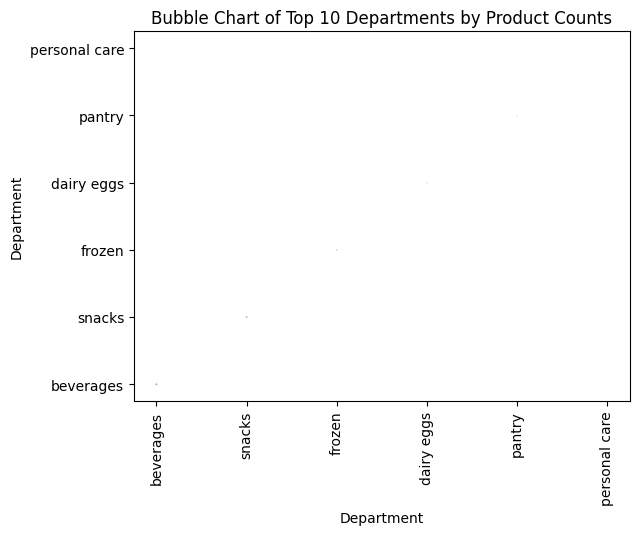

In [29]:
department_counts = df.groupby('department').count()

# Sort departments by product count and select top 10
top_10_departments = department_counts['product_name'].nlargest(10)

# Prepare data for bubble chart
departments = top_10_departments.index
product_counts = top_10_departments.values

# Reduce bubble sizes
sizes = product_counts / 10000  # Adjust the scaling factor as per your preference

# Create bubble chart
plt.scatter(departments, departments, s=sizes, alpha=0.5)

# Set labels and title
plt.xlabel('Department')
plt.ylabel('Department')
plt.title('Bubble Chart of Top 10 Departments by Product Counts')

plt.xticks(rotation=90)  # Rotates the x-axis labels to be horizontal

# Show plot
plt.show()

In [30]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'order_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'add_to_cart_order', 'reordered'],
      dtype='object')

In [31]:
grouped_df = df.groupby(['aisle_id'])
result_df = grouped_df.size().reset_index(name='count')
result_df

,aisle_id,count
0,5,15
1,11,8
2,38,329
3,61,1852
4,94,277
5,98,30
6,104,90
7,115,2078
8,116,165
9,120,156


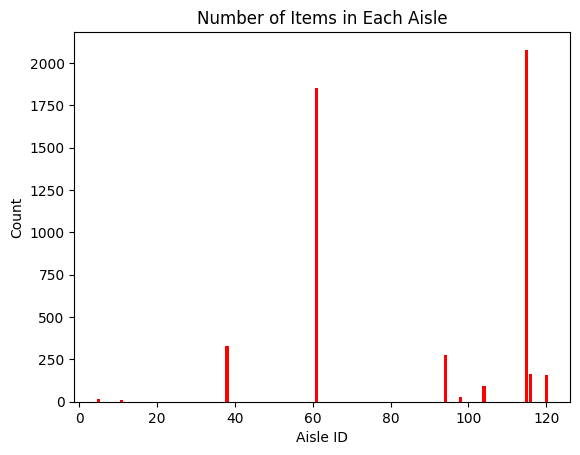

In [32]:
plt.bar(result_df['aisle_id'], result_df['count'], color='red')
plt.xlabel('Aisle ID')
plt.ylabel('Count')
plt.title('Number of Items in Each Aisle')
plt.show()

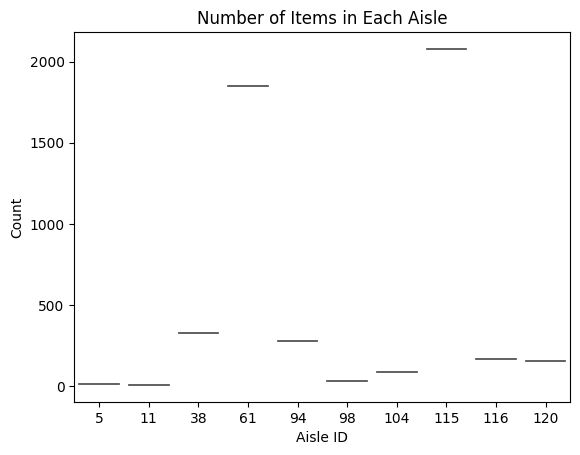

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming result_df is your DataFrame
sns.violinplot(x=result_df['aisle_id'], y=result_df['count'], color='red')
plt.xlabel('Aisle ID')
plt.ylabel('Count')
plt.title('Number of Items in Each Aisle')
plt.show()

In [34]:
top_5_df = result_df.sort_values(by='count',ascending=False)
top_5_df = top_5_df.head()
top_5_df

,aisle_id,count
7,115,2078
3,61,1852
2,38,329
4,94,277
8,116,165


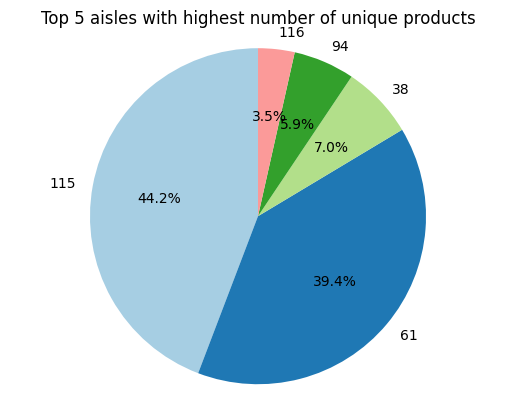

In [35]:
plt.pie(top_5_df['count'], labels=top_5_df['aisle_id'],autopct='%1.1f%%', startangle=90,colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Top 5 aisles with highest number of unique products')
plt.show()

In [36]:
grouped_df = df.groupby(['product_name'])
result_df = grouped_df.size().reset_index(name='count')
result_df

,product_name,count
0,All-Seasons Salt,90
1,Chocolate Sandwich Cookies,1852
2,Cut Russet Potatoes Steam N' Mash,165
3,Dry Nose Oil,8
4,Green Chile Anytime Sauce,15
5,Light Strawberry Blueberry Yogurt,156
6,Pure Coconut Water With Orange,30
7,Robust Golden Unsweetened Oolong Tea,277
8,Smart Ones Classic Favorites Mini Rigatoni Wit...,329
9,Sparkling Orange Juice & Prickly Pear Beverage,2078


In [37]:
top_5_df = result_df.sort_values(by='count',ascending=False)
top_5_df = top_5_df.head()
top_5_df

,product_name,count
9,Sparkling Orange Juice & Prickly Pear Beverage,2078
1,Chocolate Sandwich Cookies,1852
8,Smart Ones Classic Favorites Mini Rigatoni Wit...,329
7,Robust Golden Unsweetened Oolong Tea,277
2,Cut Russet Potatoes Steam N' Mash,165


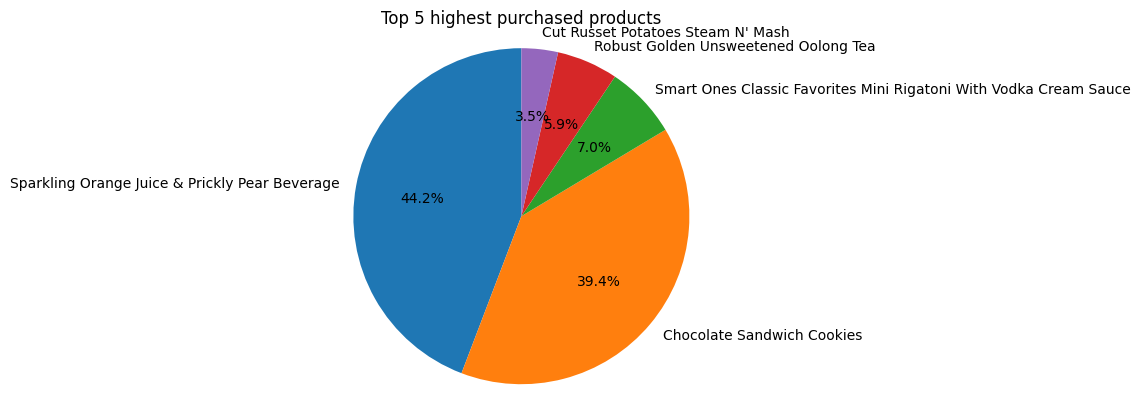

In [38]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.pie(top_5_df['count'], labels=top_5_df['product_name'],autopct='%1.1f%%', startangle=90,colors=custom_colors)
plt.axis('equal')
plt.title('Top 5 highest purchased products')
plt.show()

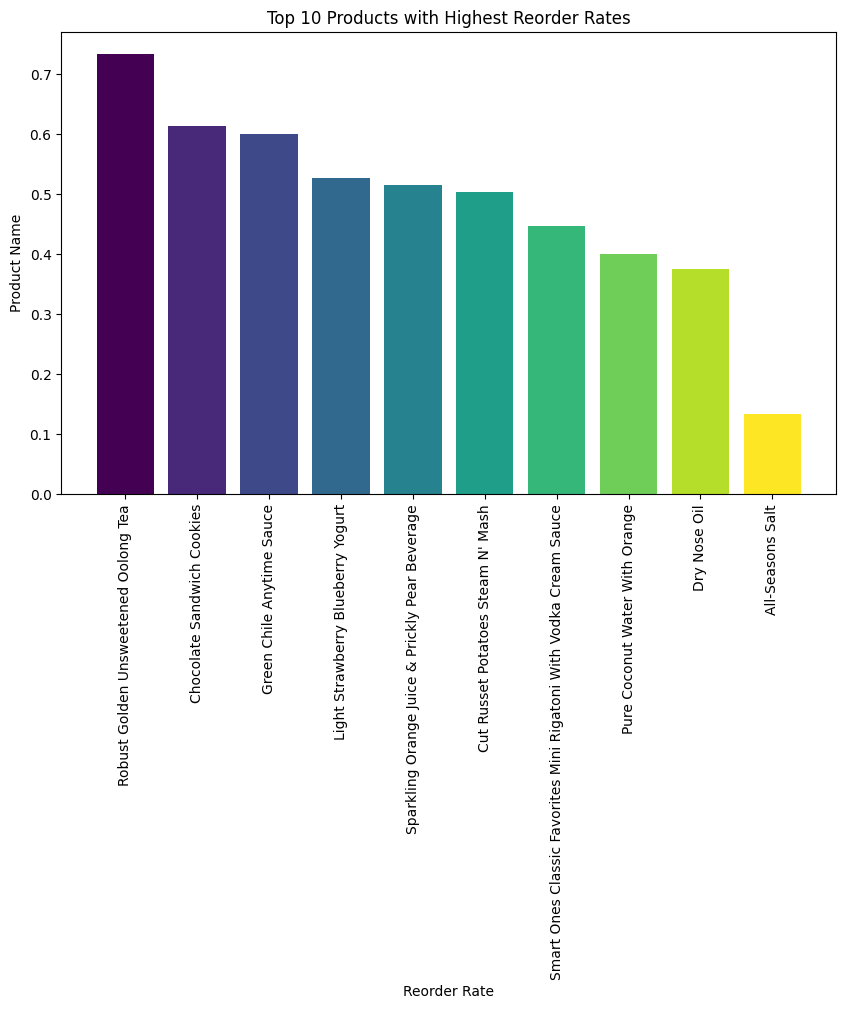

In [39]:
reorder_rates = df.groupby('product_name')['reordered'].mean().reset_index()

# Rename the columns for clarity
reorder_rates.columns = ['product_name', 'reorder_rate']

# Sort the DataFrame by reorder rate in descending order
sorted_reorder_rates = reorder_rates.sort_values(by='reorder_rate', ascending=False)

# Extract the top 10 products with the highest reorder rates
top_10_products = sorted_reorder_rates.head(10)

num_bars = len(top_10_products)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))  # Use Viridis color map for a visually pleasing color gradient



# Plotting the horizontal bar chart with values on the right
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_products['product_name'], top_10_products['reorder_rate'], color=colors)
plt.title('Top 10 Products with Highest Reorder Rates')
plt.xlabel('Reorder Rate')
plt.ylabel('Product Name')

# # Adding values on the right of each bar
# for bar, value in zip(bars, top_10_products['reorder_rate']):
#     plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{value:.2%}', va='center')

plt.xticks(rotation=90)

# Show the plot
plt.show()

In [40]:
grouped_df = df.groupby('product_name')['reordered'].count()
print(grouped_df.head())

product_name
All-Seasons Salt                       90
Chocolate Sandwich Cookies           1852
Cut Russet Potatoes Steam N' Mash     165
Dry Nose Oil                            8
Green Chile Anytime Sauce              15
Name: reordered, dtype: int64


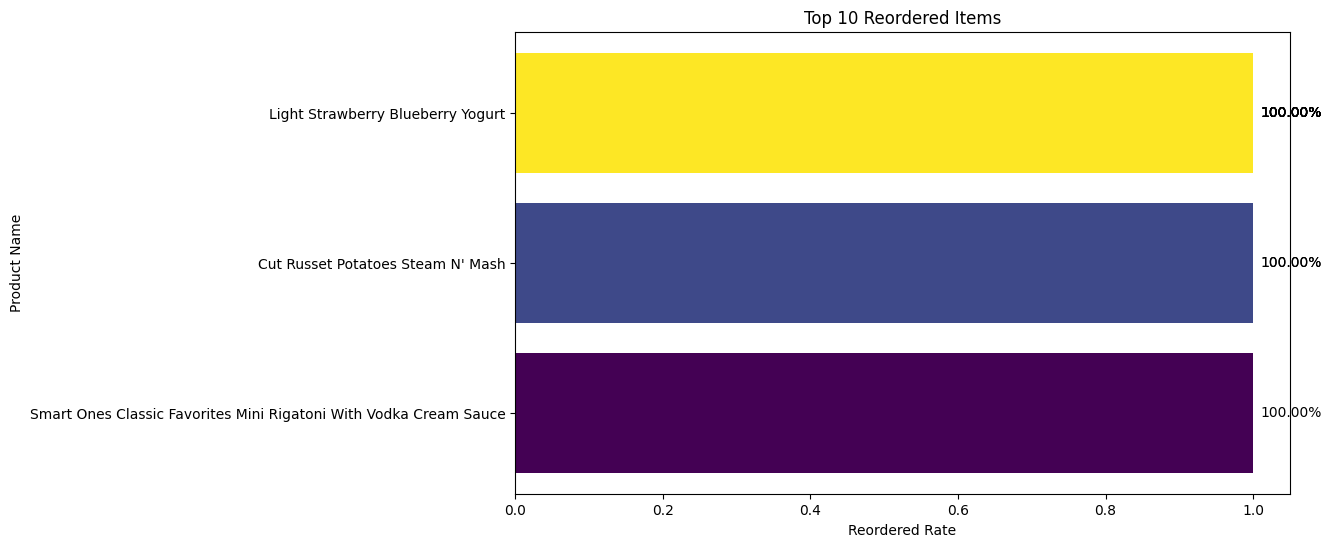

In [41]:
sorted_reordered = df.sort_values(by='reordered', ascending=False)

# Extract the top 10 reordered items
top_10_reordered = sorted_reordered.head(10)

# Generating a list of random colors for the bars
num_bars = len(top_10_reordered)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))  # Use Viridis color map for a visually pleasing color gradient

# Plotting the horizontal bar chart with values on the right
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_reordered['product_name'], top_10_reordered['reordered'], color=colors)
plt.title('Top 10 Reordered Items')
plt.xlabel('Reordered Rate')
plt.ylabel('Product Name')

# Adding values on the right of each bar
for bar, value in zip(bars, top_10_reordered['reordered']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{value:.2%}', va='center')

# Show the plot
plt.show()

In [42]:
day_of_week_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

# Replace numerical values with day names
df['order_dow'] = df['order_dow'].map(day_of_week_mapping)

In [43]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'order_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'add_to_cart_order', 'reordered'],
      dtype='object')

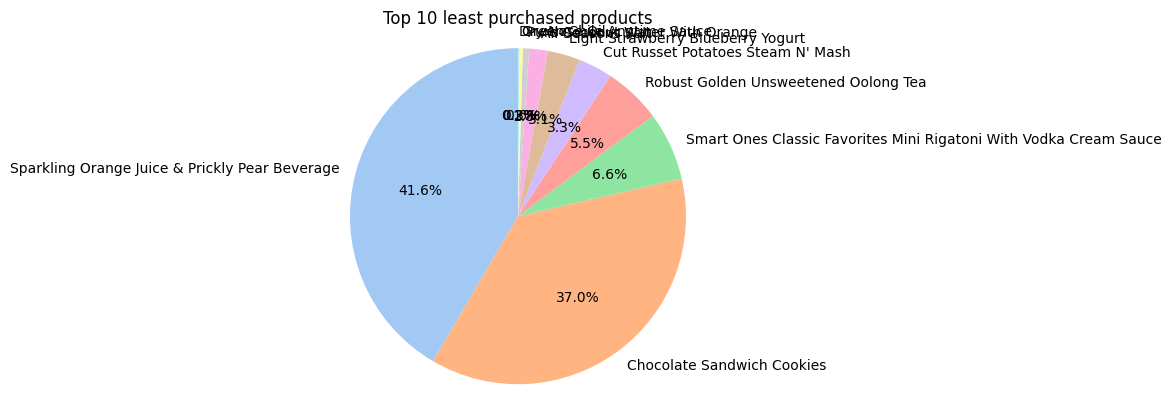

In [44]:
grouped_df = df.groupby(['product_name'])
result_df = grouped_df.size().reset_index(name='count')

top_5_df = result_df.sort_values(by='count',ascending=False)
top_5_df = top_5_df.tail(10)

custom_colors = sns.color_palette("pastel", n_colors=len(top_5_df))

# Pie chart with the new color palette
plt.pie(top_5_df['count'], labels=top_5_df['product_name'], autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.axis('equal')
plt.title('Top 10 least purchased products')
plt.show()

In [45]:
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,user_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3139998,138,28,Saturday,11,5,0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1977647,138,30,Saturday,17,1,1
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,389851,709,2,Sunday,21,20,0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,652770,764,1,Wednesday,13,10,0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1813452,764,3,Thursday,17,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages,2756637,161243,3,Thursday,1,5,0
4996,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages,2578006,161301,2,Sunday,14,4,0
4997,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages,2535986,161332,5,Monday,15,4,0
4998,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages,2715520,161332,26,Friday,14,2,1


# Model Architecture

In [46]:
from typing import Dict, Text

import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

import tensorflow as tf
from tensorflow.keras.layers import StringLookup, Embedding, Dense, Concatenate, BatchNormalization, Dropout

from tensorflow.keras.callbacks import EarlyStopping

/Users/meetpatel/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
# Performing one-hot encoding
df = pd.get_dummies(df, columns=['product_name', 'aisle', 'department', 'order_dow'])

In [48]:
import tensorflow_recommenders as tfrs
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Define the maximum user and product ID values
user_id_vocab = max(df['user_id'])
product_id_vocab = max(df['product_id'])

num_col = df.drop(['user_id', 'product_id'], axis=1)

# Define the embedding dimension
embedding_dimension = 10

# User ID model
user_id_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(user_id_vocab + 1, embedding_dimension),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
])

# Product ID model
product_id_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(product_id_vocab + 1, embedding_dimension),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
])

# Numerical model
numerical_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_col.shape[1],), dtype=tf.float32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu')
])

# Define inputs
user_id_input = tf.keras.layers.Input(shape=(1,), dtype=tf.int32, name='user_id_input')
product_id_input = tf.keras.layers.Input(shape=(1,), dtype=tf.int32, name='product_id_input')
numerical_input = tf.keras.layers.Input(shape=(num_col.shape[1],), dtype=tf.float32, name='numerical_input')

# Get embeddings
user_embeddings = user_id_model(user_id_input)
product_embeddings = product_id_model(product_id_input)
numerical_features = numerical_model(numerical_input)

# Concatenate user and product embeddings
combined_embeddings = tf.keras.layers.Concatenate()([user_embeddings, product_embeddings])

# Define the retrieval task with combined embeddings
task = tfrs.tasks.Retrieval(
    metrics=tfrs.metrics.FactorizedTopK(candidates=product_id_model),
)

# Define the model
model = tf.keras.Model(
    inputs=[user_id_input, product_id_input, numerical_input],
    outputs=[user_embeddings, product_embeddings, numerical_features]
)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.5),
              loss=['mse', 'mse', 'mse'],
              loss_weights=[1.0, 1.0, 1.0])

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2)

# Prepare train features
train_features = train_df.drop(['user_id', 'product_id'], axis=1)
train_labels = [np.zeros((len(train_df), 64)), np.zeros((len(train_df), 64)), np.zeros((len(train_df), 32))]

# Convert data to NumPy arrays
train_user_id_inputs = train_df['user_id'].values.astype(np.int32)
train_product_id_inputs = train_df['product_id'].values.astype(np.int32)
train_numerical_inputs = train_features.values.astype(np.float32)

test_features = test_df.drop(['user_id', 'product_id'], axis=1)
test_labels = [np.zeros((len(test_df), 64)), np.zeros((len(test_df), 64)), np.zeros((len(test_df), 32))]
test_user_id_inputs = test_df['user_id'].values.astype(np.int32)
test_product_id_inputs = test_df['product_id'].values.astype(np.int32)
test_numerical_inputs = test_features.values.astype(np.float32)

# Fit the model
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with EarlyStopping callback
history = model.fit(
    x={'user_id_input': train_user_id_inputs, 'product_id_input': train_product_id_inputs, 'numerical_input': train_numerical_inputs},
    y=train_labels,
    epochs=10,
    validation_data=(
        {'user_id_input': test_user_id_inputs, 'product_id_input': test_product_id_inputs, 'numerical_input': test_numerical_inputs},
        test_labels
    ),
    callbacks=[early_stopping_callback],
    verbose=1  # Print training progress
)

test_loss = model.evaluate(
    x={'user_id_input': test_user_id_inputs, 'product_id_input': test_product_id_inputs, 'numerical_input': test_numerical_inputs},
    y=test_labels
)

print("Test loss:", test_loss)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0304 - val_loss: 8.2074e-06
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4389e-04 - val_loss: 2.9264e-06
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5001e-04 - val_loss: 1.6415e-06
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1335e-04 - val_loss: 1.1149e-06
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1098e-05 - val_loss: 8.2944e-07
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6078e-05 - val_loss: 6.4838e-07
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8454e-05 - val_loss: 5.2908e-07
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0278e-05 - val_loss: 4.4668e-07
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0146e-05 - val_loss: 3.8818e-07
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1158e-05 - val_loss: 3.4073e-07
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 3.6752e-07
Tes

### Recommnendation Based on Cosine Similarity

In [ ]:
all_product_embeddings.shape

In [50]:
# Get the embeddings for all products
all_product_ids = np.arange(product_id_vocab + 1)
all_product_embeddings = product_id_model.predict(all_product_ids)

# Calculate cosine similarity between all products
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(all_product_embeddings)

# Function to get top N similar items for a given item
def get_top_similar_items(item_id, n=5):
    item_index = item_id - 1  # Since indexing starts from 0
    similar_indices = np.argsort(-similarities[item_index])[:n]  # Get indices of top similar items
    similar_items = similar_indices + 1  # Convert back to item IDs (indexing starts from 0)
    return similar_items

# Example: Get top 5 similar items for item with ID 123
similar_items = get_top_similar_items(1, n=5)
print("Top 5 similar items for item 1:", similar_items)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

In [51]:
import tensorflow as tf

def cosine_similarity(embedding1, embedding2):
    # Reshape query_embedding to have shape (1, 10)
    query_embedding = tf.reshape(embedding1, (1, -1))
    
    # Reshape item_embeddings to have shape (None, 64)
    item_embeddings = tf.reshape(embedding2, (-1, 64))
    
    # Compute cosine similarity
    dot_product = tf.reduce_sum(query_embedding * item_embeddings, axis=-1)
    norm1 = tf.norm(query_embedding, axis=-1)
    norm2 = tf.norm(item_embeddings, axis=-1)
    similarity = dot_product / (norm1 * norm2)
    return similarity



# Example function to get item recommendations based on an item
def get_item_recommendations(product_id_model, combined_embeddings, provided_item_id, top_k=5):

    # Get the embeddings for the query item
    query_embedding = product_id_model.layers[0](tf.constant([[provided_item_id]]))
    
    # Reshape combined_embeddings to have shape (None, 1, 10)
    combined_embeddings_reshaped = tf.expand_dims(combined_embeddings, axis=1)
    
    # Expand dimensions of query_embedding to match the shape of combined_embeddings_reshaped
    query_embedding_expanded = tf.expand_dims(query_embedding, axis=1)
    
    # Compute cosine similarity between the query embedding and all item embeddings
    similarities = cosine_similarity(query_embedding_expanded, combined_embeddings_reshaped)
    
    # Get the indices of top-k items with the highest similarity scores
    _, indices = tf.math.top_k(similarities, k=top_k)
    
    # Convert indices to numpy array and flatten
    recommended_item_ids = indices.numpy().flatten()
    
    return recommended_item_ids

provided_item_id = 1
    
# Get item recommendations based on the provided item
recommended_item_ids = get_item_recommendations(product_id_model, combined_embeddings, provided_item_id)
    
print("Top 5 recommended item IDs for item", provided_item_id)
print(recommended_item_ids)


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


### Recommnendation Using Tensorflow

In [52]:
# Example: Get recommendations for item with ID 123
provided_item_id = 123

# Get the embeddings for the query item
query_embedding = product_id_model.layers[0](tf.constant([[provided_item_id]]))
# Get embeddings for all items
all_items_embeddings = product_id_model.layers[0].get_weights()[0][1:]  # Exclude the embedding for padding (index 0)

# Ensure embeddings are in the required shape
all_items_embeddings = tf.expand_dims(all_items_embeddings, axis=0)

# Compute similarity scores between query embedding and all candidate embeddings
scores = tf.matmul(query_embedding, all_items_embeddings, transpose_b=True)

# Retrieve top-k recommended item indices
_, indices = tf.math.top_k(scores, k=5)

# Convert indices to numpy array and flatten
recommended_item_ids = indices.numpy().flatten()

# Print the recommended item IDs
print("Top 5 recommended item IDs for item", provided_item_id)
print(recommended_item_ids)


Top 5 recommended item IDs for item 123
[9 4 3 7 0]


In [ ]:
type(recommended_item_ids)

In [ ]:
for j in df['product_id']:
    if j in list(recommended_item_ids):
        print(j)


In [ ]:
df[df['product_id']==36]